In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')
import models.DWT2
from DTCWT.DTCWT import DTCWT
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
nb_classes = 10
batch_size = 32
epochs = 30

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)  # CIFAR-10 60,000 32X32 color

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Remove images to get smaller dataset
# x_train = x_train[:1000, :, :]
# y_train = y_train[:1000]
# x_test = x_test[:500, :, :]
# y_test = y_test[:500]


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


In [21]:
# load DWT db2 model
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
# model.add(models.DWT2.DWT(name="db2"))
model.add(DTCWT(2))
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dtcwt (DTCWT)                (None, 56, 56, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [29]:
sample = x_train[1,...,:]
sample = np.expand_dims(sample, axis=0)
out = model.predict(sample)

In [30]:
import matplotlib.pyplot as plt

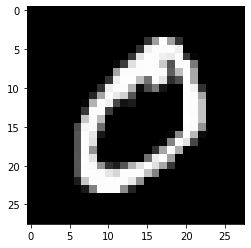

In [31]:
plt.imshow(sample[0], cmap='gray' )
plt.show()

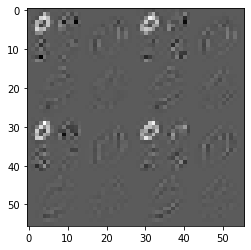

In [32]:

plt.imshow(out[0,...,0], cmap='gray' )
plt.show()

In [26]:
plt.imshow(out[0,...,1], cmap='gray')
plt.show()

IndexError: index 1 is out of bounds for axis 3 with size 1

In [27]:
plt.imshow(out[0,...,2], cmap='gray')
plt.show()

IndexError: index 2 is out of bounds for axis 3 with size 1

In [28]:
plt.imshow(out[0,...,3], cmap='gray')
plt.show()

IndexError: index 3 is out of bounds for axis 3 with size 1